---
### These Are The Movies You're Looking For
---

In this project well be analysing data on the Star Wars movies (awesome) from FiveThirtyEight.

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
%matplotlib inline

#### Import & Inspect The Raw Data
---

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.shape

(1186, 38)

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
cols = {
    'RespondentID':'ID',
    'Have you seen any of the 6 films in the Star Wars franchise?':'seen_any',
    'Do you consider yourself to be a fan of the Star Wars film franchise?':'are_you_a_fan',
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_ep1',
    'Unnamed: 4':'seen_ep2', 'Unnamed: 5':'seen_ep3', 'Unnamed: 6':'seen_ep4', 
    'Unnamed: 7':'seen_ep5', 'Unnamed: 8':'seen_ep6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_1_to_6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'favourability_characters',
    'Which character shot first?':'who_shot_first',
    'Are you familiar with the Expanded Universe?':'knowledge_of_expanded_uni',
    'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦':'fan_of_expanded_uni',
    'Do you consider yourself to be a fan of the Star Trek franchise?':'star_trek_fan',
    'Location (Census Region)':'location'}

unnamed_cols = [
    'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13','Unnamed: 14',
    'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19','Unnamed: 20', 
    'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 
    'Unnamed: 26', 'Unnamed: 27','Unnamed: 28',
]

In [6]:
star_wars = star_wars.rename(columns = cols)

#### Convert Y/N to bool

In [7]:
yn = {'yes': True, 'no': False,
     'Yes': True, 'No': False,}
star_wars['seen_any'] = star_wars['seen_any'].map(yn)
star_wars['are_you_a_fan'] = star_wars['are_you_a_fan'].map(yn)

In [8]:
print(star_wars['seen_any'].value_counts())
star_wars['are_you_a_fan'].value_counts()

True     936
False    250
Name: seen_any, dtype: int64


True     552
False    284
Name: are_you_a_fan, dtype: int64

#### Convert films seen to bools 

In [9]:
print(
    star_wars.iloc[:,3].unique(),
    star_wars.iloc[:,4].unique(),
    star_wars.iloc[:,5].unique(),
    star_wars.iloc[:,6].unique(),
    star_wars.iloc[:,7].unique(),
    star_wars.iloc[:,8].unique(),
    star_wars.iloc[:,9].unique()
)

['Star Wars: Episode I  The Phantom Menace' nan] ['Star Wars: Episode II  Attack of the Clones' nan] ['Star Wars: Episode III  Revenge of the Sith' nan] ['Star Wars: Episode IV  A New Hope' nan] ['Star Wars: Episode V The Empire Strikes Back' nan] ['Star Wars: Episode VI Return of the Jedi' nan] ['3' nan '1' '5' '6' '4' '2']


In [10]:
movie_map = {'Star Wars: Episode I  The Phantom Menace':True, 
             'Star Wars: Episode II  Attack of the Clones':True,
             'Star Wars: Episode III  Revenge of the Sith':True,
             'Star Wars: Episode IV  A New Hope':True,
             'Star Wars: Episode V The Empire Strikes Back':True,
             'Star Wars: Episode VI Return of the Jedi':True,
             1:True, 2:True, 3:True, 4:True, 5:True, 6:True,
             np.NaN: False}



cols = ['seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6']
for c in cols:
    star_wars[c] = star_wars[c].map(movie_map)
    print(star_wars[c].value_counts())

True     673
False    513
Name: seen_ep1, dtype: int64
False    615
True     571
Name: seen_ep2, dtype: int64
False    636
True     550
Name: seen_ep3, dtype: int64
True     607
False    579
Name: seen_ep4, dtype: int64
True     758
False    428
Name: seen_ep5, dtype: int64
True     738
False    448
Name: seen_ep6, dtype: int64


#### Rank of Favourites
---

In [13]:
star_wars = star_wars.rename(columns = {
    'rank_1_to_6': 'ep1_score',
    'Unnamed: 10': 'ep2_score',
    'Unnamed: 11': 'ep3_score',
    'Unnamed: 12': 'ep4_score',
    'Unnamed: 13': 'ep5_score',
    'Unnamed: 14': 'ep6_score'})

In [22]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].mean().round(2)

ep1_score    3.73
ep2_score    4.09
ep3_score    4.34
ep4_score    3.27
ep5_score    2.51
ep6_score    3.05
dtype: float64

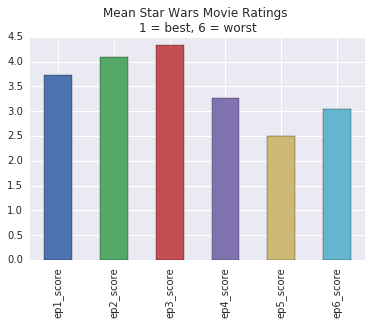

In [27]:
star_wars[star_wars.columns[9:15]].mean().round(2).plot(kind = 'bar', 
                                                        title = 'Mean Star Wars Movie Ratings \n1 = best, 6 = worst');

Up to this stage we have:

- Imported the data
- Cleaned up the column names
- Converted the 'seen_any' and 'are_you_a_fan' data to True / False
- Converted the Y/N on seen each movie to booleans
- Converted the ratings of each movie to numerical data. 

The only surprise witht the ratings is that A New Hope is rated slightly lower than Return of the Jedi. The prequal trillogy got, as the rating suggests, progressively worse. 

seen_ep1    673
seen_ep2    571
seen_ep3    550
seen_ep4    607
seen_ep5    758
seen_ep6    738
dtype: int64

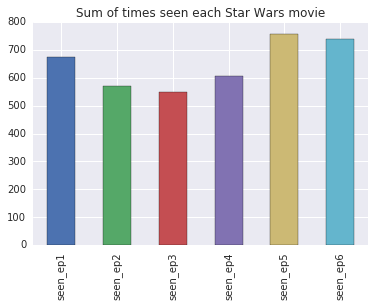

In [30]:
star_wars[star_wars.columns[3:9]].sum().round(2).plot(kind = 'bar', 
                                                        title = 'Sum of times seen each Star Wars movie');

star_wars[star_wars.columns[3:9]].sum().round(2)

More people have seen the higher mean rated movies. Looks like people say Phantom Menace and never bothered with the next two in that trillogy. 

Not surprised. 

#### Gender split

In [32]:
starman = star_wars[star_wars['Gender'] == 'Male']
starwoman = star_wars[star_wars['Gender'] == 'Female']
print(starman.shape, starwoman.shape)

(497, 38) (549, 38)


#### Men

ep1_score    4.04
ep2_score    4.22
ep3_score    4.27
ep4_score    3.00
ep5_score    2.46
ep6_score    3.00
dtype: float64

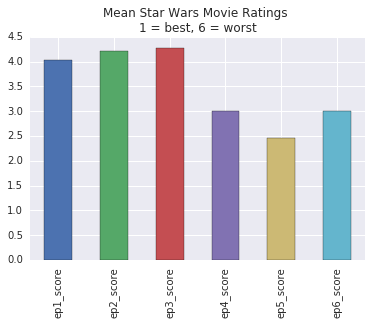

In [37]:
starman[starman.columns[9:15]].mean().round(2).plot(kind = 'bar', 
                                                        title = 'Mean Star Wars Movie Ratings \n1 = best, 6 = worst');

starman[starman.columns[9:15]].mean().round(2)

seen_ep1    361
seen_ep2    323
seen_ep3    317
seen_ep4    342
seen_ep5    392
seen_ep6    387
dtype: int64

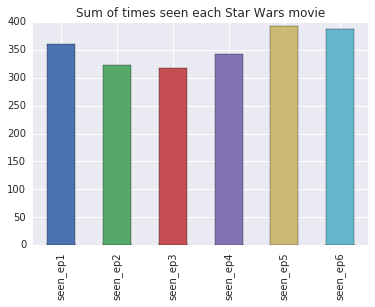

In [35]:
starman[starman.columns[3:9]].sum().round(2).plot(kind = 'bar', 
                                                        title = 'Sum of times seen each Star Wars movie');

starman[starman.columns[3:9]].sum().round(2)

#### Women

ep1_score    3.43
ep2_score    3.95
ep3_score    4.42
ep4_score    3.54
ep5_score    2.57
ep6_score    3.08
dtype: float64

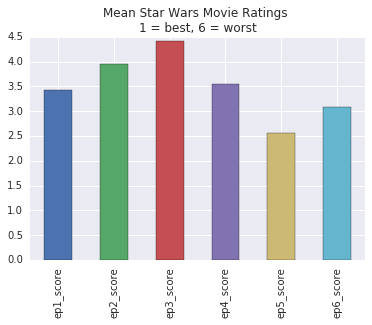

In [40]:
starwoman[starwoman.columns[9:15]].mean().round(2).plot(kind = 'bar', 
                                                        title = 'Mean Star Wars Movie Ratings \n1 = best, 6 = worst');

starwoman[starwoman.columns[9:15]].mean().round(2)

seen_ep1    298
seen_ep2    237
seen_ep3    222
seen_ep4    255
seen_ep5    353
seen_ep6    338
dtype: int64

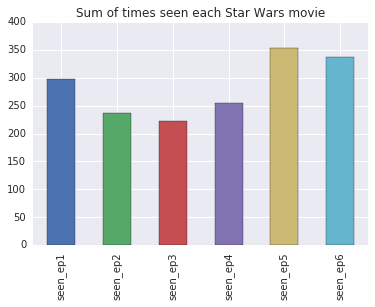

In [41]:
starwoman[starwoman.columns[3:9]].sum().round(2).plot(kind = 'bar', 
                                                        title = 'Sum of times seen each Star Wars movie');

starwoman[starwoman.columns[3:9]].sum().round(2)

Even although there are more women than men in the data, more men have seen each of the movies. 

The men rated the origianl trillogy at 3.0, 2.6 and 3.0, men like that trillogy. Conversely they are not so keen on the prequal trillogy with rating getting progressively worse with each from 4.0 to 4.2 to 4.3.

The women showed a similar trend in the prequal trillogy, although start off more favourably at a 3.5 rating for Phantom Menace, progressing to a 4.4 for Revenge of the Sith. This may have to do with the scence in Revenge of the Sith where a soon-to-be Darth Vader murders all the young Jedi. The women show a generally favourable view of the original trillogy, with similar ratings to the men. 